Nama            : Dyah Ayu Kusuma Wardhani

Kelas           : PYTN KS 019

Kode Peserta    : PYTN-KS19-02

# **ASSIGMENT 1**

Pada assigment 1, tugasnya adalah membuat visualisasi data kepada dataset dengan project rubrik, seperti Line, Area, Scatter Plot, Box Plot, Word Clouds, Folium Maps dan metode Visualization Plot.

Sumber Data : https://www.kaggle.com/datasets/jboysen/london-crime

# __A. IMPORT LIBRARY__
    Mengimport libarary-library yang dibutuhkan 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import folium
from wordcloud import WordCloud, STOPWORDS
from PIL import Image 

# __B. DATA COLLECTION__
    Data collection adalah mengumpulkan, mengukur dan menganalisis wawasan yang tepat untuk melakukan penelitian yang efektif



In [2]:
df = pd.read_csv("london_crime_by_lsoa.csv")
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


Informasi data ini:

- `lsoa_code`       : Kode untuk Area di Greater London.
- `borough`         : Nama wilayah di London.
- `major_category`  : Kategori kejahatan berat.
- `minor_category`  : Kategori kejahatan rendah.
- `value`           : Jumlah laporan kejahatan bulanan di wilayah tertentu.
- `year`            : Tahun laporan, 2008-2016.
- `month`           : Bulan laporan.


# __C. DATA EXPLORATION__
    Data exploration adalah pendekatan awal data yang meliputi memeriksa jumlah data, tipe data  dan statistikaa.

## 1. Melihat Jumlah Data dan Bentuk dari Data (Baris, Kolom)

In [3]:
df.shape        #melihat banyak kolom dan baris 

(13490604, 7)

In [4]:
df.info()       #Melihat tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


Data ini memiliki 7 kolom dan 1048575 baris, dengan tipe data object dan integer.

## 2. Melihat Sebagian Data

In [5]:
df.head()       #melihat data bagian atas

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [6]:
df.tail()   #melihat data bagian bawah

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


## 3. Melihat Deskripsi Data

In [7]:
df.describe().value   # mendeskripsikan dataframe value

count    1.349060e+07
mean     4.779444e-01
std      1.771513e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      3.090000e+02
Name: value, dtype: float64

# __D. Data Cleaning__
    Data cleaning adalah proses menyiapkan data untuk analisis dengan menghapus atau memodifikasi data yang salah, tidak lengkap, tidak relevan, duplikat, atau format yang salah.

## 1. Mengecek Nilai NaN

In [8]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Dari hasil analisa diatas, diketahui bahwa dataset yang akan dipakai sudah bersih **tidak memiliki missing value**, sehingga data dapat diolah.

## 2. Mengecek Duplicate Data

In [9]:
df.duplicated().sum()

0

Dari hasil analisa diatas, diketahui bahwa **tidak terdapat duplicate data**

# __E. Data Preprocessing__
    Data Preprocessing adalah proses mengubah data mentah yang sangat beragam dan tidak terstruktur mejadi data lebih mudah dipahami


## 1. Menghapus Kolom
        Menghapus kolom yang tidak diperlukan untuk memvisualisasi data.

In [10]:
df.drop(['lsoa_code','month'], axis=1, inplace=True)    #mengahapus kolom lsoa_code karena saat memvisualisasi saya tidak membutuhkan kolom ini
df

,borough,major_category,minor_category,value,year
0,Croydon,Burglary,Burglary in Other Buildings,0,2016
1,Greenwich,Violence Against the Person,Other violence,0,2016
2,Bromley,Violence Against the Person,Other violence,0,2015
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016
4,Wandsworth,Robbery,Personal Property,0,2008
...,...,...,...,...,...
13490599,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015
13490600,Hillingdon,Robbery,Personal Property,1,2015
13490601,Sutton,Burglary,Burglary in a Dwelling,0,2011
13490602,Croydon,Robbery,Business Property,0,2011


## 2. Mengganti Nama Kolom
    Mengganti nama kolom agar lebih mudah dipahami. Disini saya mengganti nama kolom borought menjadi "City" dan kolom value menjadi "Counted"


In [11]:
df.rename(columns={'borough': 'City', 'value':'Counted'}, inplace= True)    
df

,City,major_category,minor_category,Counted,year
0,Croydon,Burglary,Burglary in Other Buildings,0,2016
1,Greenwich,Violence Against the Person,Other violence,0,2016
2,Bromley,Violence Against the Person,Other violence,0,2015
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016
4,Wandsworth,Robbery,Personal Property,0,2008
...,...,...,...,...,...
13490599,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015
13490600,Hillingdon,Robbery,Personal Property,1,2015
13490601,Sutton,Burglary,Burglary in a Dwelling,0,2011
13490602,Croydon,Robbery,Business Property,0,2011


# __F. Mengolah dan Memvisualisasi Data__

Rumusan masalah:
1. Berapakah total kejadian Kriminal di London selama tahun 2008-2016?
2. Kriminalitas yang paling banyak terjadi di London selama 7 tahun terakhir (2008-2016) ? Bagaimana perkembangan setiap tahunnya ?
3. Kota mana saja dengan total kejadian kriminal tertinggi pada tahun 2015?
4. Apa saja kejahatan yang paling banyak terjadi di kota Croydon pada tahun 2014-2016?
5. Bagaimana perbandingan banyak kejahatan "Violence Against the Person" yang terjadi di kota Greenwich dan Tower Hamlets pada tahun  2008 - 2016 ?
6. Manakah kota dengan total kriminal terbanyak pada tahun 2008-2016 berdasarkan WordCloud?

- Menentukan Top 5 Major Category

In [12]:
df['major_category'].value_counts().head(5)

major_category
Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Name: count, dtype: int64

Berdasarkan analisis diatas, pada tahun 2008-2016 Theft and Handling merupakan kriminalitas yang banyak terjadi di Landon


- Mengelompokkan data pada kolom major_category dan year
    
    Dan disini major category dikelompokkan dengan tahun dan banyak kejadian criminal pada tahun itu.

In [13]:
MajorCrime = df.pivot_table(values='Counted',
                        index=['year'],
                        columns=['major_category'],
                        aggfunc=np.sum,
                        fill_value=0)
MajorCrime

C:\Users\USER\AppData\Local\Temp\ipykernel_9560\4152523500.py:1: FutureWarning: The provided callable <function sum at 0x0000024B25FD20C0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  MajorCrime = df.pivot_table(values='Counted',


major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


- Mengelompokkan data berdasarkan Top 5 major_category dan mengonvert menjadi dataa frame baru
        
    Membuat data frame baru lalu dikelompokan kembali. Nanti akan diketahui urutan tahun dan banyaknya masing-masing kejahatan pada Top 5 major_category (Theft and Handling, Violence Against the Person, Criminal Damage, Drugs, Burglary) yang dilakukan pada tahun tersebut.

In [14]:
top_crimemajor = df.pivot_table(values='Counted',
                        index=['year'],
                        columns=['major_category'],
                        aggfunc=np.sum,
                        fill_value=0)

# membuat dataframe sesuai wilayah
dfcrime1= top_crimemajor['Theft and Handling']
dfcrime2= top_crimemajor['Violence Against the Person']
dfcrime3= top_crimemajor['Criminal Damage']
dfcrime4= top_crimemajor['Drugs']
dfcrime5= top_crimemajor['Burglary']
          

C:\Users\USER\AppData\Local\Temp\ipykernel_9560\1356474257.py:1: FutureWarning: The provided callable <function sum at 0x0000024B25FD20C0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  top_crimemajor = df.pivot_table(values='Counted',


- Menggabungkan Dataframe
    
    Mengabungkan dataframe menjadi satu, sehingga diperoleh urutan tahun, dan jumlah masing-masing kejahatan pada Top 5 major_category (Theft and Handling, Violence Against the Person, Criminal Damage, Drugs, Burglary).

In [15]:
dfcrime= [dfcrime1, dfcrime2, dfcrime3, dfcrime4, dfcrime5] 
df_top5MajorCrime= pd.concat(dfcrime, join='outer', axis=1).fillna(0)
df_top5MajorCrime.index.name=None
df_top5MajorCrime

,Theft and Handling,Violence Against the Person,Criminal Damage,Drugs,Burglary
2008,283692,159844,91872,68804,88092
2009,279492,160777,85565,60549,90619
2010,290924,157894,77897,58674,86826
2011,309292,146901,70914,57550,93315
2012,334054,150014,62158,51776,93392
2013,306372,146181,56206,50278,87222
2014,279880,185349,59279,44435,76053
2015,284022,218740,62976,39785,70489
2016,294133,232381,64071,38914,68285


## __1. Total Kejadian Kriminal di London Selama Tahun 2008-2016__
-----------------------------------------------------------------------------------------

- Mengelompokan __major_crime__

In [16]:
major_crime = df.groupby(['major_category','year'])['Counted'].sum()
major_crime

major_category               year
Burglary                     2008     88092
                             2009     90619
                             2010     86826
                             2011     93315
                             2012     93392
                                      ...  
Violence Against the Person  2012    150014
                             2013    146181
                             2014    185349
                             2015    218740
                             2016    232381
Name: Counted, Length: 81, dtype: int64

- Membuat __major_crime__ menjadi data frame
    
    Membuat frame pada __major_crime__ lalu mengubah nama colom Counted menjadi Total

In [17]:
TotalCrime =  major_crime.to_frame()
TotalCrime.rename(columns={'Counted': 'Total'}, inplace=True)
TotalCrime.index.name=None
TotalCrime

Total
major_category              year        
Burglary                    2008   88092
                            2009   90619
                            2010   86826
                            2011   93315
                            2012   93392
...                                  ...
Violence Against the Person 2012  150014
                            2013  146181
                            2014  185349
                            2015  218740
                            2016  232381

[81 rows x 1 columns]

- Mengelompokan data __TotalCrime__

    Mengelompokan data __TotalCrime__ berdasarkan tahun, sehingga menjumlahkan kejahatan yang terjadi disetiap tahunnya


In [18]:
TotalCrime = TotalCrime.groupby("year").sum()
TotalCrime['Year'] = TotalCrime.index
TotalCrime = TotalCrime[['Year', 'Total']]
TotalCrime.index = range(len(TotalCrime))
TotalCrime

,Year,Total
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


__*VISUALISASI DATA*__

#### __- Scatter Plot : Total Top Crime tahun 2008 - 2016__

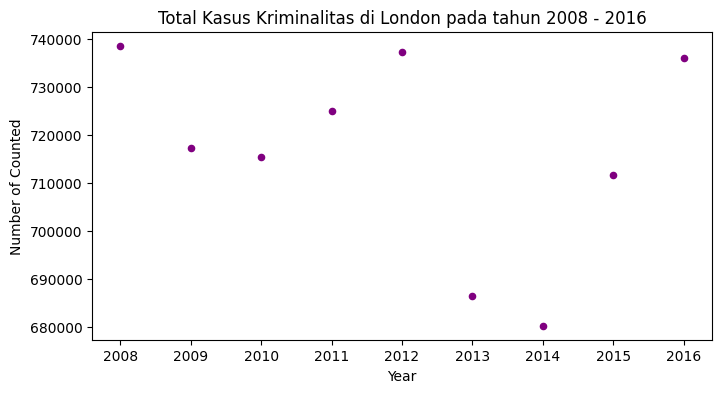

In [77]:
TotalCrime.plot(kind='scatter', x='Year', y='Total', figsize=(8, 4), color='purple')
plt.title('Total Kasus Kriminalitas di London pada tahun 2008 - 2016')
plt.xlabel('Year')
plt.ylabel('Number of Counted')
plt.show()

#### __- Plot Gabungan : Total Top Crime tahun 2008 - 2016__

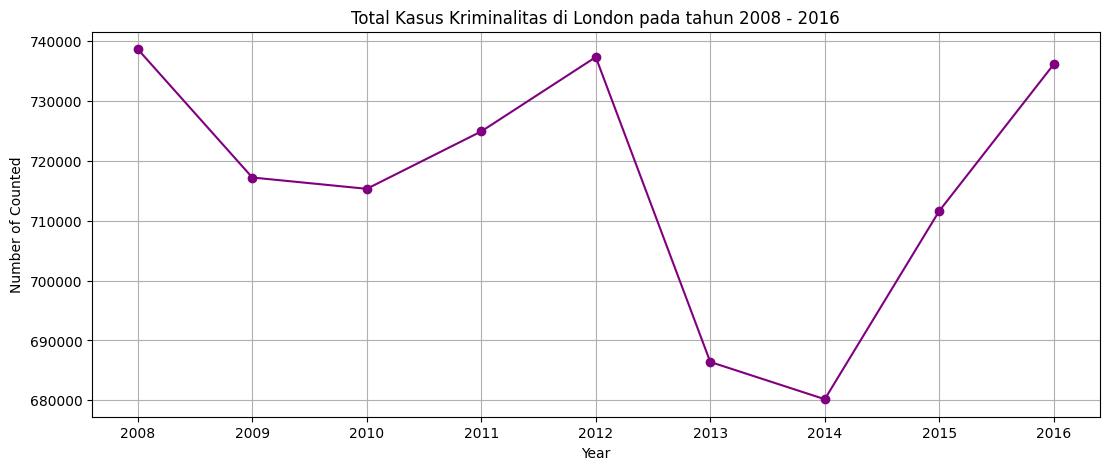

In [80]:
#  Mendefinisikan component figure dan axes
Figure = plt.figure()
Axes  = plt.axes()

#  Mendefinisikan fungsi grid
Axes.grid()

# Mendefinisikan nilai pada sumbu x dan sumbu y
xlabel = [2008,2009,2010,2011,2012,2013,2014,2015,2016]
ylabel = [738641,717214,715324,724915,737329,686407,680183,711624,736121]

# Mendefisikan fungsi untuk menampilkan visualisasi 
Axes.plot(xlabel, ylabel, color = 'purple', marker='o')
plt.rcParams['figure.figsize'] = [13,7]

# Menambahkan nama sumbu x, y, dan tittle
plt.xlabel('Year')
plt.ylabel('Number of Counted')
plt.title('Total Kasus Kriminalitas di London pada tahun 2008 - 2016')

# Menampilkan plot
plt.show()

#### __KESIMPULAN__

|Year|Total Kasus|
|:-------|:------|
|2008| 738.641 |
|2009| 717.214 |
|2010| 715.324 | 
|2011| 724.915 | 
|2012| 737.329 | 
|2013| 686.407 | 
|2014| 680.183 | 
|2015| 711.624 | 
|2016| 736.121 | 

1. Kejahatan **tertinggi** terjadi pada tahun **2008** yaitu sebanyak 738.641 kejadian 
2. Kejahatan **terendah** terjadi pada tahun **2014** yaitu sebanyak 680.183
3. Pada rentang tahun **2008-2010** kejahatan yang terjadi di London terjadi **penurunan** kasus kejahatan, yaitu sebesar 23.317 kasus
4. Pada rentang tahun **2010-2012** kejahatan di London mengalami **kenaikan** jumlah kasus kejahatan sebesar 22.005 kasus
5. Pada rentang tahun **2012-2014** kejahatan yang terjadi pada London kembali  **menurun**. Terutama dari tahun 2012 ke tahun 2013 terjadi penurunan yang sangat drastis, sebesar 50.922 kejadian kriminal dan pada tahun 2013 ke 2014 terjadi lagi penurunan lagi  sekitar 6.224 kejadian.
6. Pada rentang tahun **2014 - 2016** kota London terjadi **peningkatan kriminalitas** sebesar 55.938 kejadian.



## __2. Keriminalitas Yang Paling Banyak Terjadi di London Selama 8 Tahun Terakhir (2008-2016) dan Perkembangan Setiap Tahunnya__

--------------------------------------------------------------------------------------------------------------

- Memanggil __df_top5MajorCrime__

In [21]:
df_top5MajorCrime   

,Theft and Handling,Violence Against the Person,Criminal Damage,Drugs,Burglary
2008,283692,159844,91872,68804,88092
2009,279492,160777,85565,60549,90619
2010,290924,157894,77897,58674,86826
2011,309292,146901,70914,57550,93315
2012,334054,150014,62158,51776,93392
2013,306372,146181,56206,50278,87222
2014,279880,185349,59279,44435,76053
2015,284022,218740,62976,39785,70489
2016,294133,232381,64071,38914,68285


In [81]:
#TOP 5 Major Category pada tahun 2008-2016
df['major_category'].value_counts().head(5)

major_category
Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Name: count, dtype: int64

Kriminalitas yang paling banyak terjadi di Landon selama 8 tahun terkahir, yaitu Theft and Handling, Violence Against the Person, Criminal Damage, Drugs, dan Burglary

__*VISUALISASI DATA*__

#### __- Line Plot : Top 5 Crime tahun 2008-2016__


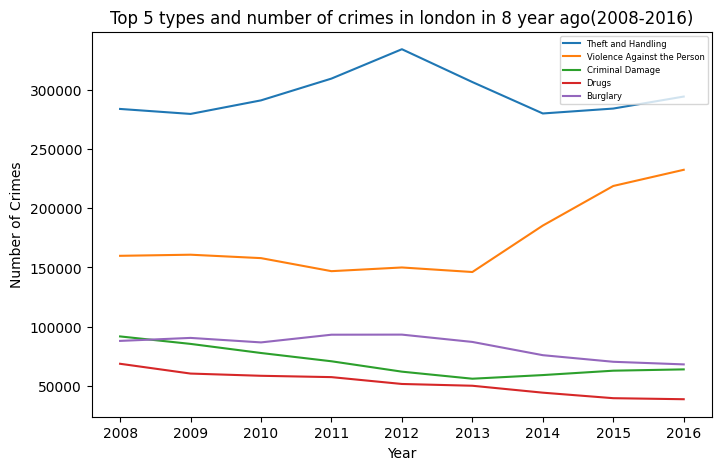

In [82]:
df_top5MajorCrime.plot(kind='line', figsize=(8,5))   #memanggil plot line dan menentukan ukuran 
plt.title('Top 5 types and number of crimes in london in 8 year ago(2008-2016)')   #memberi judul plot line
plt.ylabel('Number of Crimes')  #label sumbu y
plt.xlabel('Year')  #label sumbu x
plt.legend(loc='upper right', prop={'size': 6}) #menyeting tempat dan ukuran legend
plt.show()  #menampilkan plot

#### __- Area Plot : Top 5 Major tahun 2008-2016__

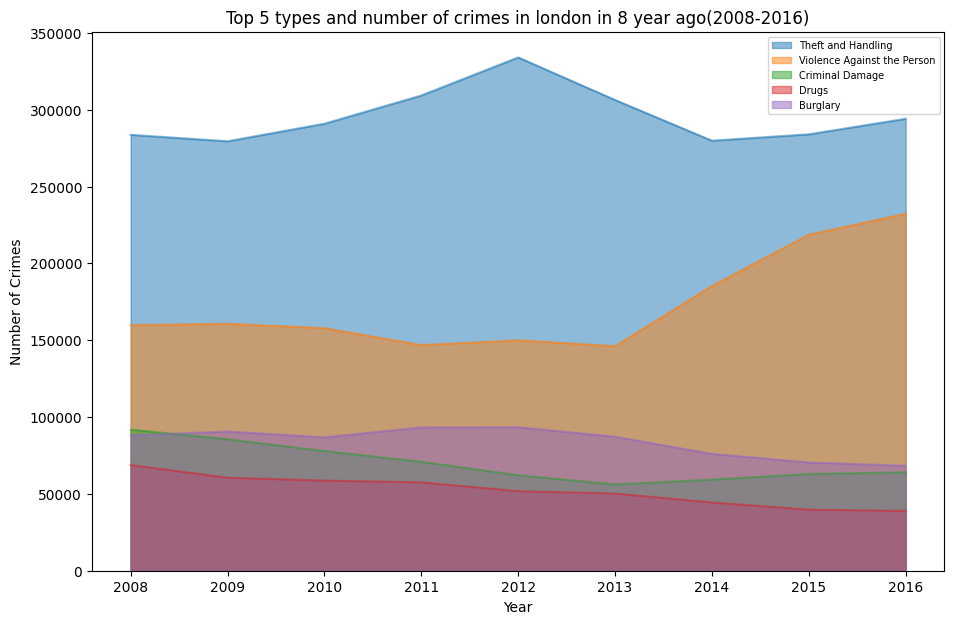

In [83]:

df_top5MajorCrime.index = df_top5MajorCrime.index.map(int)

df_top5MajorCrime.plot(kind='area',
            stacked=False,
            figsize=(11,7),)

plt.title('Top 5 types and number of crimes in london in 8 year ago(2008-2016)')   #memberi judul plot line
plt.ylabel('Number of Crimes')  #label sumbu y
plt.xlabel('Year')  #label sumbu x
plt.legend(loc='upper right', prop={'size': 7}) 

plt.show()

#### __KESIMPULAN__
1. **5** Kriminalitas yang **paling banyak terjadi** di Landon selama 8 tahun terakhir, yaitu **Theft and Handling, Violence Against the Person, Criminal Damage, Drugs,** dan **Burglary**
2. **Theft and Handling**
    - Merupakan kejahatan yang paling banyak terjadi selama tahun 2008 - 2016, yaitu terdapat **3.966.300** kasus. 
    - Dari grafik bisa dilihat bhawa, kejahatan Theft and Handling dari awal tahun 2009 sampai tahun 2012 mengalami kenaikan dan pada tahun 2012 - 2014 mengalami penurunan yang signifikan, lalu kembali naik lagi ditahun 2014-2016.
3. **Violence Against the Person**
    - Kejahatan Violence Against the Person pada tahun 2008-2016 memiliki total kasus yang mencapai  **3.171.744** kejadian.
    - Dari grafik bisa dilihat bhawa, kejahatan Violence Against the Person ditahun 2009-2013 mengalami turun naik yang tidak teralu signifikan, namun pada 2013-2016 mengalami pelonjokan kasus yang drastis.
4. **Criminal Damage**
    - Criminal Damage memiliki total **2.069.172** kasus kriminal yang terjadi pada rentang tahun 2008-2016.
    - Dari grafik bisa dilihat bhawa, kasus Criminal Damage turun melandai ditahun 2008 - 2013, dan naik secara melandai juga ditahun 2013-2016.
5. **Drugs**
    - Dari tahun 2008-2016 total kasus Drugs mencapai **1.179.468** kasus.
    - Dari grafik bisa dilihat bahawa, kasus kejahatan Drugs dari tahun 2008 - 2014 turun terus secara melandai.
6. **Burglary**
    - Kejahatan Burglary memiliki total kejadian mencapai **1.043.604** kasus pada tahun 2008-2016. 
    - Dari grafik bisa dilihat bahawa, kasus kejahatan Burglary naik secara melandai sepanjang tahun 2010 - 2012, dan ditahun berikutnya terus turun secara melandai.


## __3. Kota Dengan Total Kejadian Kriminal Tertinggi Pada Tahun 2015__
----------------------------------------------------------------------------------------------------------

- Memanggil **MajorCrime**, untuk melihat data 

In [49]:
MajorCrime

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


- Mengelompokan **CityCriminal2015**
    
    Mengelompokan kota kota di London **"City"** lalu menjumlahkan banyak kasus yang terjadi pada periode tahun 2015


In [26]:
CityCriminal2015= (df[(df['year'] == 2015) & (df['major_category'])].groupby('City')['Counted'].sum())
CityCriminal2015

City
Barking and Dagenham      16346
Barnet                    24036
Bexley                    11990
Brent                     24883
Bromley                   20637
Camden                    29477
City of London              151
Croydon                   28089
Ealing                    26247
Enfield                   22076
Greenwich                 20929
Hackney                   26941
Hammersmith and Fulham    19848
Haringey                  24626
Harrow                    12601
Havering                  15870
Hillingdon                23234
Hounslow                  21286
Islington                 27032
Kensington and Chelsea    19070
Kingston upon Thames       9738
Lambeth                   33164
Lewisham                  23437
Merton                    12273
Newham                    29217
Redbridge                 18897
Richmond upon Thames      10413
Southwark                 30260
Sutton                    10598
Tower Hamlets             27493
Waltham Forest            20969
Wan

- Menentukan **TopCityCriminal2015**

In [27]:
CityCriminal2015.to_frame()
TopCityCriminal2015 = CityCriminal2015.sort_values(ascending=False).head(5)
TopCityCriminal2015

City
Westminster    47395
Lambeth        33164
Southwark      30260
Camden         29477
Newham         29217
Name: Counted, dtype: int64

__*VISUALISASI DATA*__

#### __- Bar Chart : The City with The Highest Crime rate in 2015.__

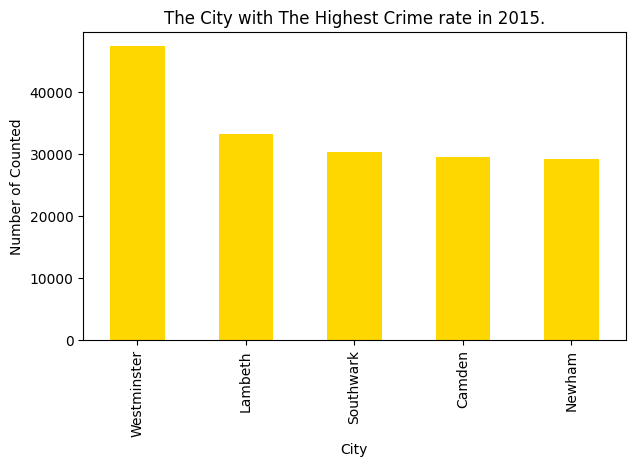

In [28]:
TopCityCriminal2015.plot(kind='bar',color = 'gold', figsize=(7,4))
plt.title("The City with The Highest Crime rate in 2015.")
plt.xlabel("City")
plt.ylabel("Number of Counted") 
plt.show()

#### __KESIMPULAN__

1. Berdasarkan chart diatas dapat kita ketahui bahwa, **Kota Westminster** merupakan kota dengan **kasus kriminal tertinggi**, yaitu sekitar **47.395 kasus** pada priode tahun 2015
2. Lalu disusul kota Lambeth dengan 33.164 kasus, Southwark 30.260 kasus, Camden 29.477 kasus, dan Newham dengan 29.217 kasus

## __4. Kejahatan Yang Paling Banyak Terjadi di Kota Croydon pada Tahun 2014-2016__
------------------------------------------------------------------------------------

- Mengelompokan **Croydon**
    
    Mengelompokan macam macam kasus yang terjadi di Kota Croydon pada tahun 2014-2015 lalu menjumlahkannya.

In [29]:
Croydon = (df[(df['year'] >= 2014 ) & (df['City'] == 'Croydon')].groupby('major_category')['Counted'].sum())
Croydon

major_category
Burglary                        8595
Criminal Damage                 9162
Drugs                           4803
Fraud or Forgery                   0
Other Notifiable Offences       1803
Robbery                         2840
Sexual Offences                    0
Theft and Handling             28525
Violence Against the Person    28430
Name: Counted, dtype: int64

- Mensortir value **Croydon**
    
    Mensortir kasus berdasarkan nilai terbesar, lalu mengambil 5 teratas.

In [30]:
Croydon.to_frame()
df_sorted_Croydon = Croydon.sort_values(ascending=False).head(5)
df_sorted_Croydon

major_category
Theft and Handling             28525
Violence Against the Person    28430
Criminal Damage                 9162
Burglary                        8595
Drugs                           4803
Name: Counted, dtype: int64

__*VISUALISASI DATA*__

#### __- Pie Chart : The most frequent crime in the city of Croydon from 2014 - 2016.__

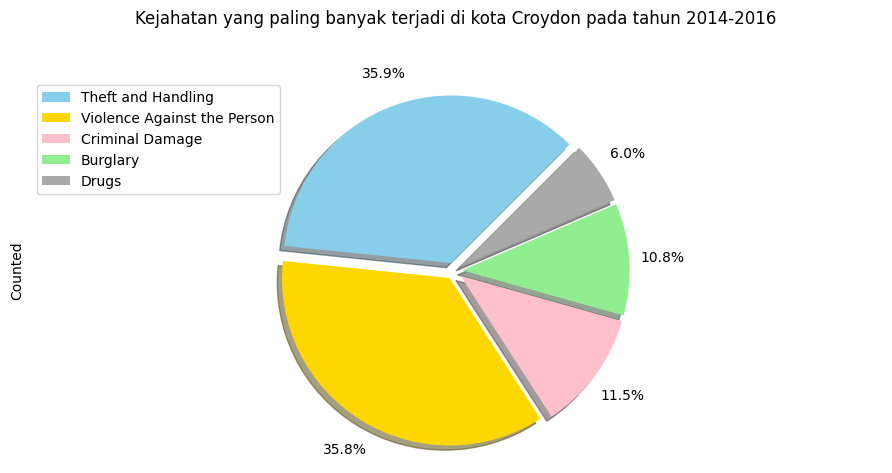

In [31]:
colors_list = ['skyblue','gold','pink','lightgreen','darkgrey']

#pilih ukuran lingkaran
explode_list = [0.05, 0.05, 0.05, 0.05, 0.05]

#Tambahkan details
df_sorted_Croydon.plot(kind='pie',
        figsize=(11,5),
        autopct='%1.1f%%',
        startangle=45,
        shadow=True,
        labels=None,
        pctdistance=1.2,
        colors=colors_list,
        explode=explode_list)

#untuk memberikan informasi daerah berwarna
plt.legend(labels=df_sorted_Croydon.index,loc='upper left')
plt.axis('equal')

#menambahkan judul
plt.title('Kejahatan yang paling banyak terjadi di kota Croydon pada tahun 2014-2016',y=1.12)

#menampilkan
plt.show()

#### __KESIMPULAN__
1. Selama tahun 2014-2015, **Theft and Handling** merupakan kasus kriminal yang **paling banyak** terjadi di Kota Croydon, yaitu **28.525** kasus atau **35,9%** dari total 5 kasus kejahatan yang sering terjadi.
2. Kasus **Violence Against the Person** merupakan peringkat ke 2 kejahatan yang paling banyak terjadi yaitu **28.430** kasus atau **35,8%** dari total 5 kasus kejahatan yang sering terjadi.. Memiliki banyak kejadian yang tidak terlalu jauh beda dari Theft and Handling.
3. **Criminal Damage** di peringkat 3 dengan kasus kejahatan tertinggi selama priode tahun 2014-2016, yaitu **9.162** kasus atau **11,5%** dari total 5 kasus kejahatan yang sering terjadi.
4. Lalu diperingkat ke 4  ada **Burglary** dengan banyak kasus **8.595** atau **10,8%** dari total 5 kasus kejahatan yang sering terjadi di Kota Croydon
5. **Drugs** merupakan peringkat 5 dari banyaknya kasus yang tejadi di Kota Croydon selama thn 2014-2016, yaitu **4.803** atau **6 %**dari total 5 kasus kejahatan yang sering terjadi.



#### __- Visualisasi Kota Croydon__

In [32]:
Croydon_map = folium.Map(location=[51.3762,-0.0982], zoom_start=15)

# display world map
Croydon_map

Maps Kota Croydon. Maps dapat dizoom sesuai dengan yang kita inginkan.

## __5. Perbandingan banyak Kejahatan "Burglary" yang Terjadi di Kota Greenwich dan Tower Hamlets pada Tahun 2010 - 2016__
-----------------------------------------------------------------------------------------------------------------

- Memanggil **df_top5MajorCrime**

In [53]:
df_top5MajorCrime

,Theft and Handling,Violence Against the Person,Criminal Damage,Drugs,Burglary
2008,283692,159844,91872,68804,88092
2009,279492,160777,85565,60549,90619
2010,290924,157894,77897,58674,86826
2011,309292,146901,70914,57550,93315
2012,334054,150014,62158,51776,93392
2013,306372,146181,56206,50278,87222
2014,279880,185349,59279,44435,76053
2015,284022,218740,62976,39785,70489
2016,294133,232381,64071,38914,68285


- Mengelompokan kasus kejahatn **Burglary** di kota **Greenwich** dan **Tower Hamlets**

In [69]:
Greenwich = df[(df['major_category'] == 'Burglary') & (df['City'] == 'Greenwich') 
               & (df['year'] >= 2010)].groupby('year')['Counted'].sum().to_frame()
Greenwich.rename(columns={'Counted': 'Burglary in Greenwich'}, inplace=True)
Greenwich.index.name=None
Greenwich

,Burglary in Greenwich
2010,2494
2011,2300
2012,2305
2013,2369
2014,2145
2015,1864
2016,1780


In [70]:
TowerHamlets = df[(df['major_category'] == 'Burglary') & (df['City'] == 'Tower Hamlets') 
                & (df['year'] >= 2010)].groupby('year')['Counted'].sum().to_frame()
TowerHamlets.rename(columns={'Counted': 'Burglary in Tower Hamlets'}, inplace=True)
TowerHamlets.index.name=None
TowerHamlets

,Burglary in Tower Hamlets
2010,2088
2011,2495
2012,2631
2013,2695
2014,2319
2015,2560
2016,2794


- Menggabungkan data kasus kejahatn **Burglary** di kota **Greenwich** dan **Tower Hamlets**

In [72]:
df_GT = pd.concat([Greenwich,TowerHamlets], axis =1)
df_GT

,Burglary in Greenwich,Burglary in Tower Hamlets
2010,2494,2088
2011,2300,2495
2012,2305,2631
2013,2369,2695
2014,2145,2319
2015,1864,2560
2016,1780,2794


__*VISUALISASI DATA*__

#### __- Histogram : Violence Against the Person in Greenwich and Tower Hamlets from 2010 - 2016.__

In [73]:
count, bin = np.histogram(df_GT)

count
bin

array([1780. , 1881.4, 1982.8, 2084.2, 2185.6, 2287. , 2388.4, 2489.8,
       2591.2, 2692.6, 2794. ])

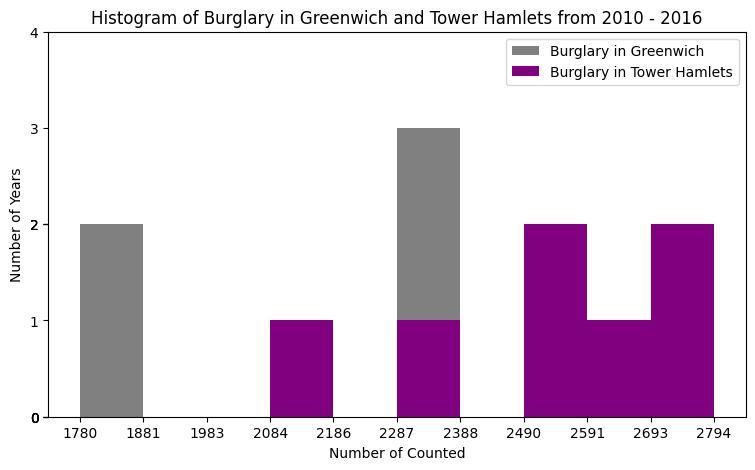

In [75]:
df_GT.plot(kind='hist', figsize=(9, 5), xticks=bin, yticks= count, color=['grey','purple'])

plt.title('Histogram of Burglary in Greenwich and Tower Hamlets from 2010 - 2016')
plt.ylabel('Number of Years')
plt.xlabel('Number of Counted')

plt.show()

#### __KESIMPULAN__

1. Berdasarkan Histogram, diketahui bahwa jumlah kejahatan Burglary yang terjadi di **Kota Greenwich** pada tahun 2010-2016 yang terjadi, adalah sebagai berikut
    
    - Terdapat 2 tahun memiliki jumlahtindak kriminal diantara range 1.780 - 1.881 kasus.
    - Terdapat 3 tahun yang memiliki jumlah tindak kriminal diantara range 2.287-2.388 kasus.

2. Berdasarkan Histogram, diketahui bahwa jumlah kejahatan Burglary yang terjadi di **Kota Tower Hamlets** pada tahun 2010-2016 yang terjadi, adalah sebagai berikut
    - Terdapat 1 tahun memiliki jumlah tindak kriminal diantara range 2.084 - 2.186 kasus.
    - Terdapat 1 tahun yang memiliki jumlah tindak kriminal diantara range 2.287 - 2.388 kasus.
    - Terdapat 2 tahun yang memiliki jumlah tindaka kriminal diantara range 2.490 - 2.591 kasus.
    - Terdapat 1 tahun memiliki jumlah tindak kriminal diantara range 2.591 - 2.693 kasus.
    - Terdapat 2 tahun memiliki jumlah tindak kriminal diantara range 2.693 - 2.794 kasus.
    

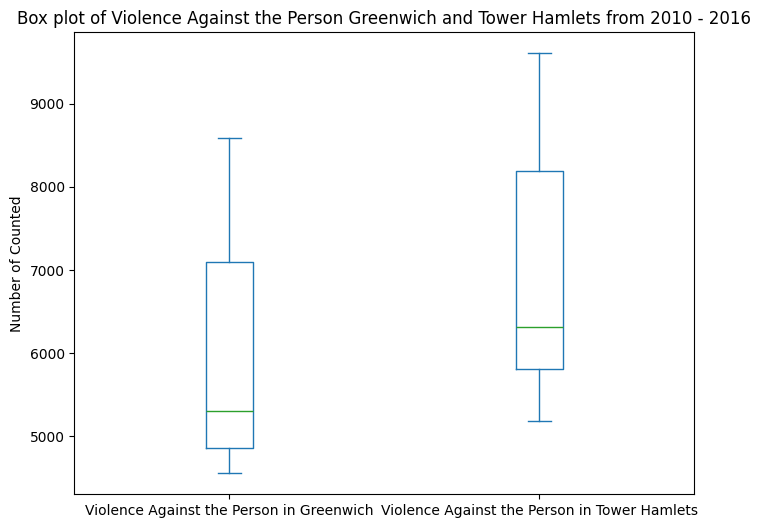

In [38]:
df_GT.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Violence Against the Person Greenwich and Tower Hamlets from 2010 - 2016')
plt.ylabel('Number of Counted')

plt.show()

In [76]:
df_GT.describe()

,Burglary in Greenwich,Burglary in Tower Hamlets
count,7.000000,7.000000
mean,2179.571429,2511.714286
std,266.277335,240.413335
min,1780.000000,2088.000000
25%,2004.500000,2407.000000
50%,2300.000000,2560.000000
75%,2337.000000,2663.000000
max,2494.000000,2794.000000


#### __KESIMPULAN__

1. Berdasarkan Box plot, diketahui bahwa jumlah **kejahatan Bulglary** di kota **Greenwich lebih sedikit** dibanding jumlah kejahatan di kota **Tower Hamlets** sepanjang tahun 2010-2016. Hal ini dapat diketahui sesuai dengan posisi box plot di kota Greenwich yang lebih rendah dibanding box plot di kota Tower Hamlets. 
2. Garis hijau menandakan **rata-rata dari jumlah kejahatan** Bulglary di kota **Greenwich**, yaitu sebanyak **2.180** kasus. Dan rata-rata jumlah kejahatan Bulglary di kota **Tower Hamlets**, yaitu sebanyak **2.512** kasus.
3. **Total kasus** Bulglary di kota **Greenwich terbanyak** sebesar **2.494** kasus, dan **terendah** sebanyak **1.780** kasus. Sedangkan total kasus Bulglary di kota **Tower Hamlets terbanyak** sebesar **2.794** kasus, dan **terendah** sebanyak **2.088** kasus.

## __6. Kasus Kriminal Dengan Total Kejadian Terbanyak pada Tahun 2008-2016 di London__
-------------------------------------------------------------------------------------------

In [40]:
TopCityCriminal1 = df.groupby('minor_category')['Counted'].sum().reset_index()
TopCityCriminal1 = TopCityCriminal1.sort_values(by='Counted',ascending=False)
TopCityCriminal1.set_index('minor_category')

,Counted
minor_category,
Other Theft,980085
Theft From Motor Vehicle,569956
Burglary in a Dwelling,491282
Harassment,458124
Assault with Injury,451001
Possession Of Drugs,431948
Common Assault,413690
Theft From Shops,345142
Other Theft Person,308842


In [41]:
text = ",".join(cat for cat in TopCityCriminal1['minor_category'])
text

'Other Theft,Theft From Motor Vehicle,Burglary in a Dwelling,Harassment,Assault with Injury,Possession Of Drugs,Common Assault,Theft From Shops,Other Theft Person,Criminal Damage To Motor Vehicle,Burglary in Other Buildings,Personal Property,Theft/Taking Of Motor Vehicle,Theft/Taking of Pedal Cycle,Criminal Damage To Dwelling,Other Criminal Damage,Wounding/GBH,Other Notifiable,Other violence,Criminal Damage To Other Building,Motor Vehicle Interference & Tampering,Offensive Weapon,Drug Trafficking,Business Property,Handling Stolen Goods,Going Equipped,Counted per Victim,Other Drugs,Other Fraud & Forgery,Other Sexual,Murder,Rape'

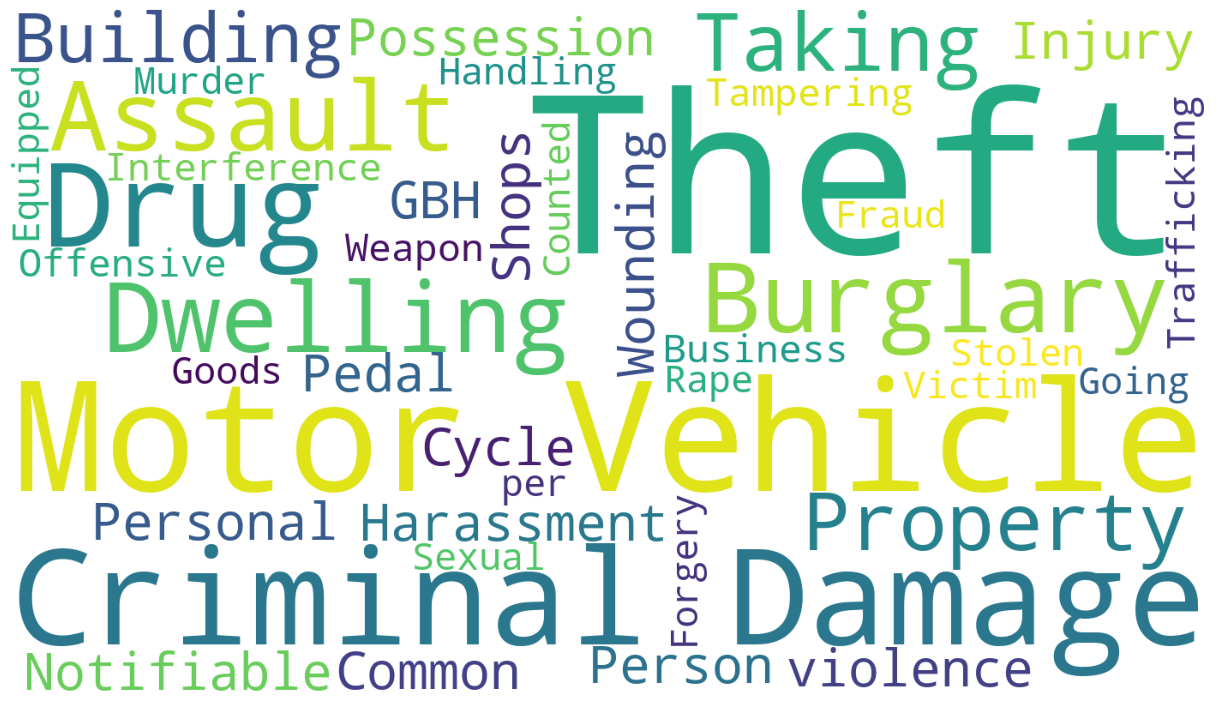

In [42]:
stopwords = set(STOPWORDS)

# Membuat WordCloud object
WC = WordCloud(width = 1400, height = 800, background_color = 'white', stopwords=stopwords)

# Generate the word cloud
WC.generate(text)

# Plot the word cloud
plt.figure(figsize=(12,7), facecolor = None)
plt.imshow(WC)
plt.axis("off")
plt.tight_layout(pad = 0)

# Tampilkan plot
plt.show()

In [43]:
London = np.array(Image.open('Paus.png'))
London

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [44]:
London.shape

(816, 1200, 4)

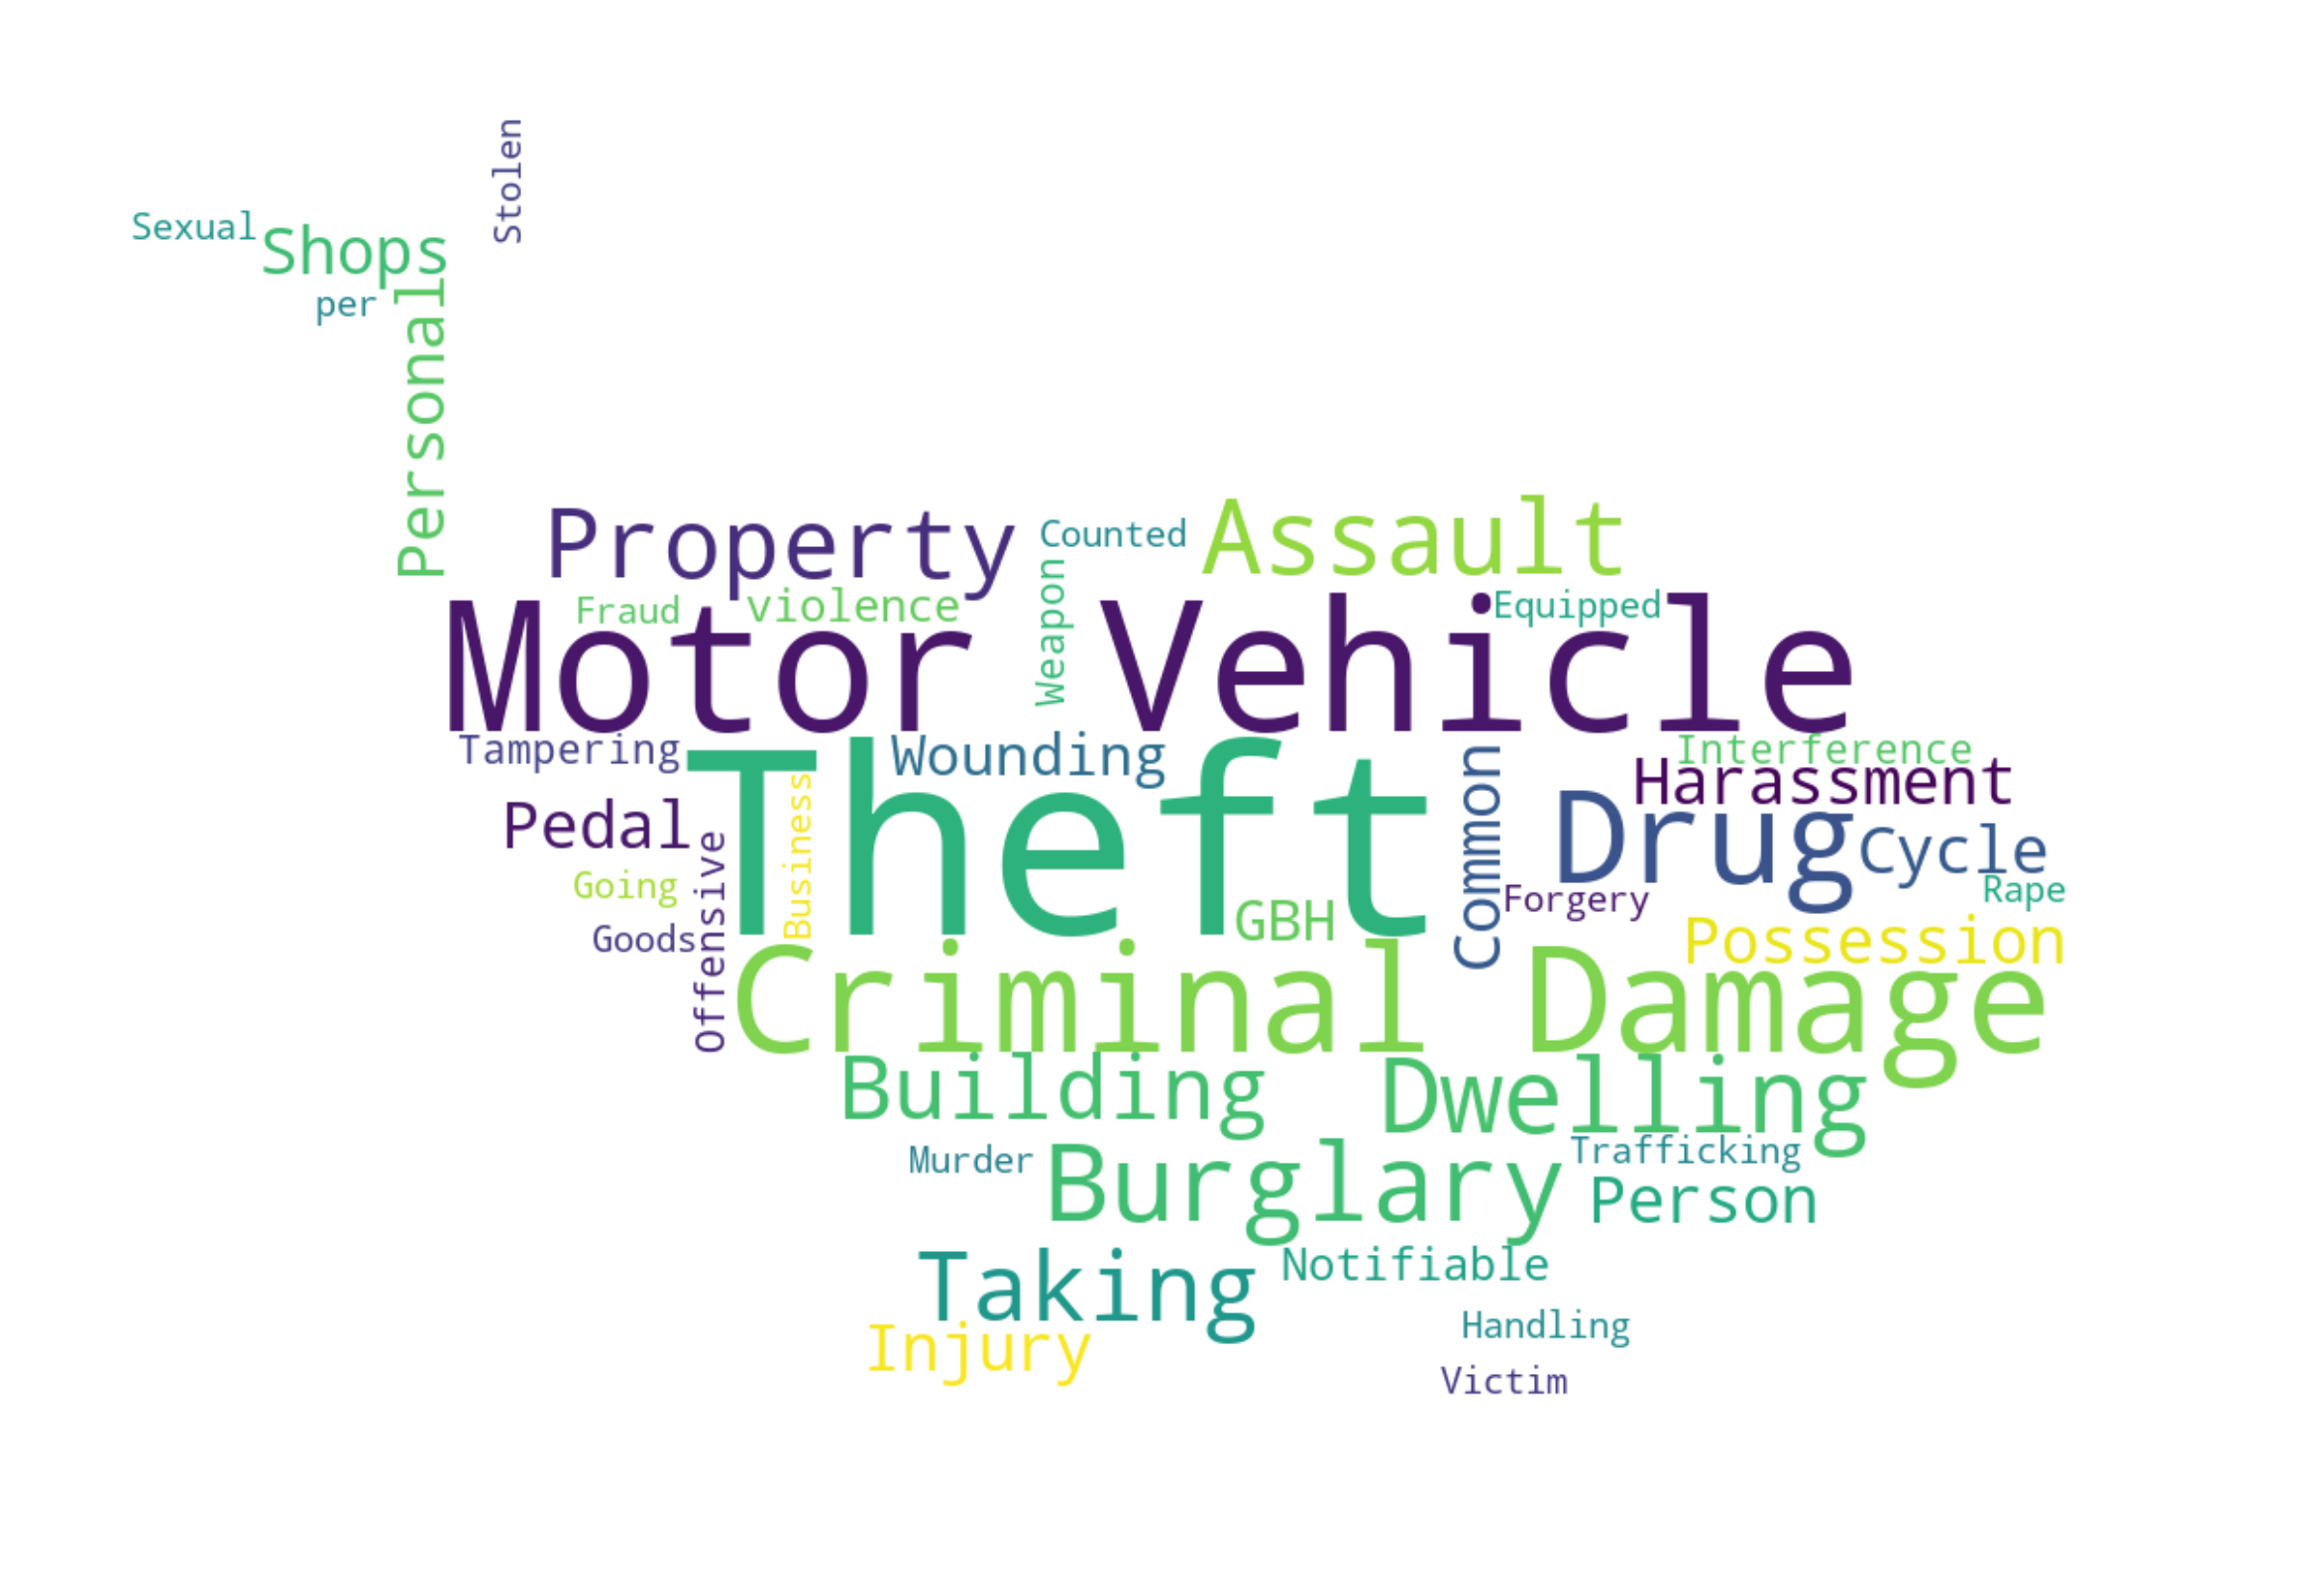

In [45]:
London_wc = WordCloud(background_color='white', max_words=1000, mask=London)

# generate the word cloud
London_wc.generate(text)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(30) # set width
fig.set_figheight(30) # set height

plt.imshow(London_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### __KESIMPULAN__

Dapat dilihat bahwa kejahatan dengan font paling besar (menandakan kejahatan tersebut memiliki total kejadian yang banyak terjadi), diantaranya adalah sebagai berikut.
1. Theft
2. Motor Vehicle
3. Criminal Damage
4. Drug
5. Bulglary

-----------------------------------------------------
# G. KESIMPULAN KESELURUHAN

## __1. Total Kejadian Kriminal di London Selama Tahun 2008 - 2016__
|Year|Total Kasus|
|:-------|:------|
|2008| 738.641 |
|2009| 717.214 |
|2010| 715.324 | 
|2011| 724.915 | 
|2012| 737.329 | 
|2013| 686.407 | 
|2014| 680.183 | 
|2015| 711.624 | 
|2016| 736.121 | 

- Kejahatan **tertinggi** terjadi pada tahun **2008** yaitu sebanyak 738.641 kejadian 
- Kejahatan **terendah** terjadi pada tahun **2014** yaitu sebanyak 680.183


## __2. Keriminalitas Yang Paling Banyak Terjadi di London Selama 8 Tahun Terakhir (2008-2016) dan Perkembangan Setiap Tahunnya__
-  **5** Kriminalitas yang **paling banyak terjadi** di Landon selama 7 tahun terakhir, yaitu **Theft and Handling, Violence Against the Person, Criminal Damage, Drugs,** dan **Burglary**
- **Theft and Handling**
    1)  Merupakan kejahatan yang paling banyak terjadi selama tahun 2008 - 2016, yaitu terdapat **3.966.300** kasus. 
    2)  Dari grafik bisa dilihat bhawa, kejahatan Theft and Handling dari awal tahun 2009 sampai tahun 2012 mengalami kenaikan dan pada tahun 2012 - 2014 mengalami penurunan yang signifikan, lalu kembali naik lagi ditahun 2014-2016.
- **Violence Against the Person**
    1) Kejahatan Violence Against the Person pada tahun 2008-2016 memiliki total kasus yang mencapai  **3.171.744** kejadian.
    2) Dari grafik bisa dilihat bhawa, kejahatan Violence Against the Person ditahun 2009-2013 mengalami turun naik yang tidak teralu signifikan, namun pada 2013-2016 mengalami pelonjokan kasus yang drastis.
- **Criminal Damage**
    1) Criminal Damage memiliki total **2.069.172** kasus kriminal yang terjadi pada rentang tahun 2008-2016.
    2) Dari grafik bisa dilihat bhawa, kasus Criminal Damage turun melandai ditahun 2008 - 2013, dan naik secara melandai juga ditahun 2013-2016.
- **Drugs**
    1) Dari tahun 2008-2016 total kasus Drugs mencapai **1.179.468** kasus.
    2) Dari grafik bisa dilihat bahawa, kasus kejahatan Drugs dari tahun 2008 - 2014 turun terus secara melandai.
- **Burglary**
    1) Kejahatan Burglary memiliki total kejadian mencapai **1.043.604** kasus pada tahun 2008-2016. 
    2) Dari grafik bisa dilihat bahawa, kasus kejahatan Burglary naik secara melandai sepanjang tahun 2010 - 2012, dan ditahun berikutnya terus turun secara melandai.


## __3. Kota Dengan Total Kejadian Kriminal Tertinggi Pada Tahun 2015__
-  Berdasarkan chart diatas dapat kita ketahui bahwa, **Kota Westminster** merupakan kota dengan **kasus kriminal tertinggi**, yaitu sekitar **47.395 kasus** pada priode tahun 2015
-  Lalu disusul kota Lambeth dengan 33.164 kasus, Southwark 30.260 kasus, Camden 29.477 kasus, dan Newham dengan 29.217 kasus


## __4. Kejahatan Yang Paling Banyak Terjadi di Kota Croydon pada Tahun 2014-2016__
- Selama tahun 2014-2015, **Theft and Handling** merupakan kasus kriminal yang **paling banyak** terjadi di Kota Croydon, yaitu **28.525** kasus atau **35,9%** dari total 5 kasus kejahatan yang sering terjadi.
- Kasus **Violence Against the Person** merupakan peringkat ke 2 kejahatan yang paling banyak terjadi yaitu **28.430** kasus atau **35,8%** dari total 5 kasus kejahatan yang sering terjadi.. Memiliki banyak kejadian yang tidak terlalu jauh beda dari Theft and Handling.
- **Criminal Damage** di peringkat 3 dengan kasus kejahatan tertinggi selama priode tahun 2014-2016, yaitu **9.162** kasus atau **11,5%** dari total 5 kasus kejahatan yang sering terjadi.
- Lalu diperingkat ke 4  ada **Burglary** dengan banyak kasus **8.595** atau **10,8%** dari total 5 kasus kejahatan yang sering terjadi di Kota Croydon
- **Drugs** merupakan peringkat 5 dari banyaknya kasus yang tejadi di Kota Croydon selama thn 2014-2016, yaitu **4.803** atau **6 %**dari total 5 kasus kejahatan yang sering terjadi.

## __5. Perbandingan banyak Kejahatan "Burglary" yang Terjadi di Kota Greenwich dan Tower Hamlets pada Tahun 2010 - 2016__
- Berdasarkan Histogram, diketahui bahwa jumlah kejahatan Burglary yang terjadi di **Kota Greenwich** pada tahun 2010-2016 yang terjadi, adalah sebagai berikut
    1) Terdapat 2 tahun memiliki jumlahtindak kriminal diantara range 1.780 - 1.881 kasus.
    2) Terdapat 3 tahun yang memiliki jumlah tindak kriminal diantara range 2.287-2.388 kasus.

- Berdasarkan Histogram, diketahui bahwa jumlah kejahatan Burglary yang terjadi di **Kota Tower Hamlets** pada tahun 2010-2016 yang terjadi, adalah sebagai berikut
    1) Terdapat 1 tahun memiliki jumlah tindak kriminal diantara range 2.084 - 2.186 kasus.
    2) Terdapat 1 tahun yang memiliki jumlah tindak kriminal diantara range 2.287 - 2.388 kasus.
    3) Terdapat 2 tahun yang memiliki jumlah tindaka kriminal diantara range 2.490 - 2.591 kasus.
    4) Terdapat 1 tahun memiliki jumlah tindak kriminal diantara range 2.591 - 2.693 kasus.
    5) Terdapat 2 tahun memiliki jumlah tindak kriminal diantara range 2.693 - 2.794 kasus.

- Berdasarkan Box plot, diketahui bahwa jumlah **kejahatan Bulglary** di kota **Greenwich lebih sedikit** dibanding jumlah  kejahatan di kota **Tower Hamlets** sepanjang tahun 2010-2016. Hal ini dapat diketahui sesuai dengan posisi box plot di kota Greenwich yang lebih rendah dibanding box plot di kota Tower Hamlets. 

- Garis hijau menandakan **rata-rata dari jumlah kejahatan** Bulglary di kota **Greenwich**, yaitu sebanyak **2.180** kasus. Dan rata-rata jumlah kejahatan Bulglary di kota **Tower Hamlets**, yaitu sebanyak **2.512** kasus.
    
- **Total kasus** Bulglary di kota **Greenwich terbanyak** sebesar **2.494** kasus, dan **terendah** sebanyak **1.780** kasus. Sedangkan total kasus Bulglary di kota **Tower Hamlets terbanyak** sebesar **2.794** kasus, dan **terendah** sebanyak **2.088** kasus. 
    
## __6. Kasus Kriminal Dengan Total Kejadian Terbanyak pada Tahun 2008-2016 di London__
Dapat dilihat bahwa kejahatan dengan font paling besar (menandakan kejahatan tersebut memiliki total kejadian yang banyak terjadi), diantaranya adalah sebagai berikut.
1. Theft
2. Motor Vehicle
3. Criminal Damage
4. Drug
5. Bulglary